In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (13, 10)

sns.set(style="whitegrid")

In [2]:
auctions = pd.read_csv("auctions.csv", dtype={"platform":"int8", "ref_type_id":"int8", "source_id":"int8"})

In [3]:
auctions["date"] =  pd.to_datetime(auctions["date"], errors = "coerce")

In [4]:
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [6]:
auctions["cantidad_subastas"] = 1
auctions["fecha"] = auctions["date"].dt.date

Text(0.5, 1.0, 'Cantidad de subastas registradas por día')

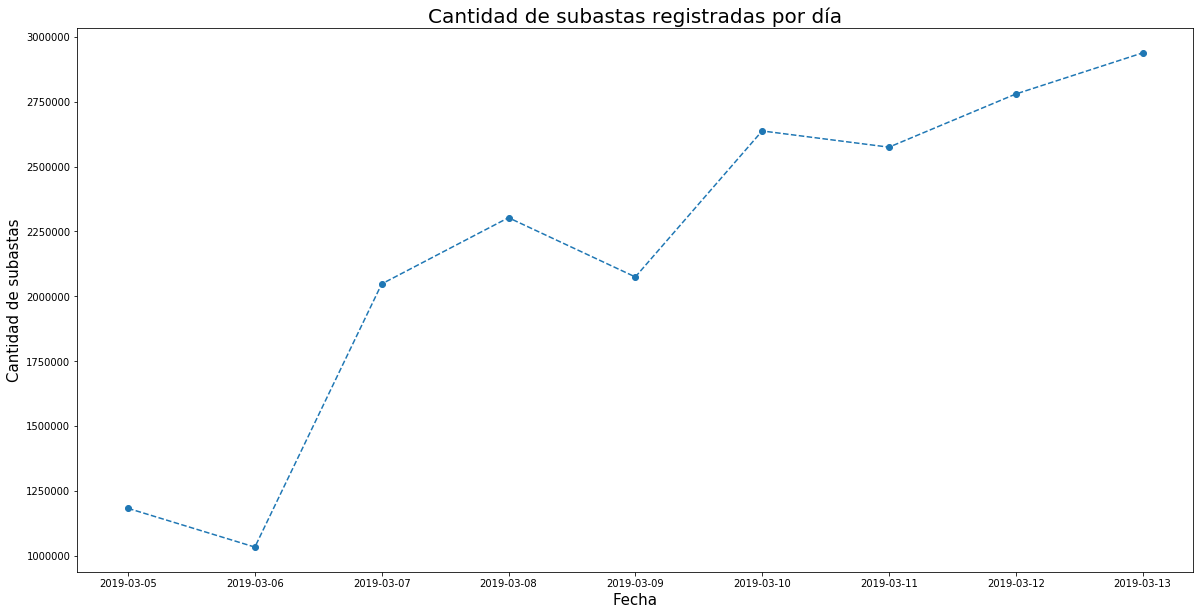

In [11]:
plot = auctions.groupby('fecha').agg({'cantidad_subastas': 'count'}).plot(figsize=(20,10), style = 'o--', legend = False);
plot.set_ylabel("Cantidad de subastas", fontsize = 15)
plot.set_xlabel("Fecha", fontsize = 15)
plot.set_title("Cantidad de subastas registradas por día", fontsize = 20)

In [16]:
df_to_plot = auctions.groupby(["fecha", "platform"]).agg({"cantidad_subastas":"count"})

Text(0.5, 1.0, 'Cantidad de subastas registradas por día por plataforma')

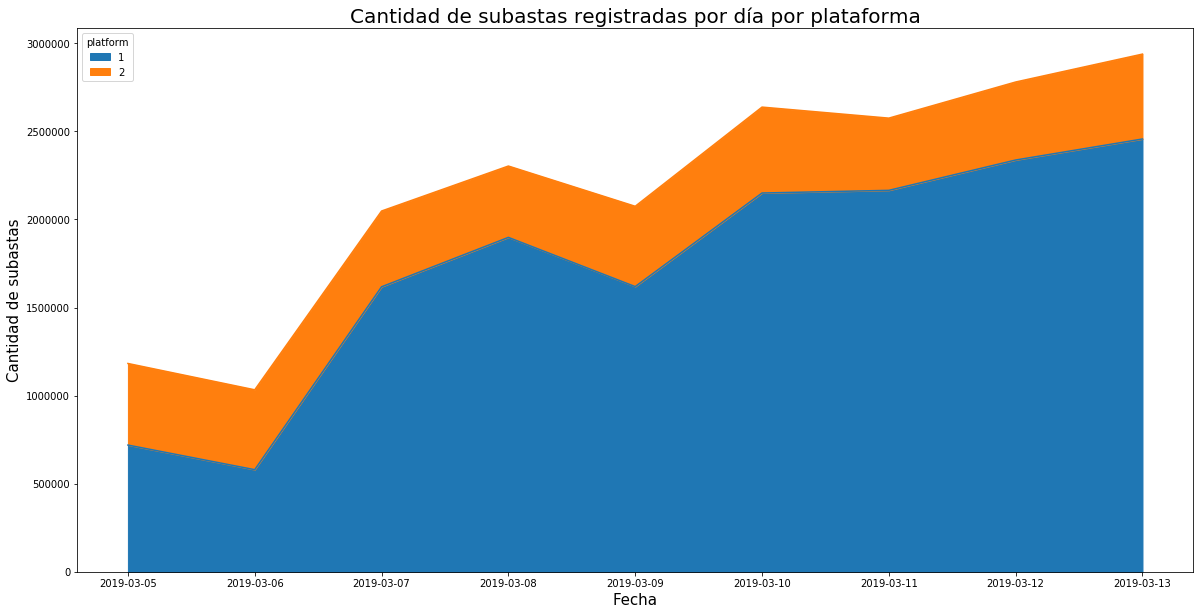

In [22]:
plot = df_to_plot.unstack().cantidad_subastas.plot.area(figsize = (20,10))
plot.set_ylabel("Cantidad de subastas", fontsize = 15)
plot.set_xlabel("Fecha", fontsize = 15)
plot.set_title("Cantidad de subastas registradas por día por plataforma", fontsize = 20)

In [4]:
# auctions_sorted = auctions.loc[:, ["device_id","date"]].sort_values(["device_id","date"])

In [5]:
""" def calcular_reapariciones_usuarios(df):
    
    lista = [0,0,0,0,0,0,0,0,0,0,0,0,0]
    
    last_device_id = auctions_sorted.reset_index().loc[0].values[1]
    last_date = auctions_sorted.reset_index().loc[0].values[2]
    for a,row in df.iterrows():
        
        device_id = row["device_id"]
        date_act = row['date']
            
        if device_id != last_device_id:
            last_device_id = device_id
            last_date = date_act
            continue
        
        dif = ((date_act - last_date).seconds)/3600    #es la diferencia en horas del date actual con el date anterior
        dif_round = round(dif,0) #se redondea la diferencia
         
        if dif_round == 0:
             lista[0] += 1
                
        if dif_round == 1:
            lista[1] += 1
            
        if dif_round == 2:
            lista[2] += 1
            
        if dif_round == 3:
            lista[3] += 1
            
        if dif_round == 4:
            lista[4] += 1
            
        if dif_round == 5:
            lista[5] += 1
            
        if dif_round == 6:
            lista[6] += 1
            
        if dif_round == 7:
            lista[7] += 1
            
        if dif_round == 8:
            lista[8] += 1
            
        if dif_round == 9:
            lista[9] += 1
            
        if dif_round == 10:
            lista[10] += 1
            
        if dif_round == 11:
            lista[11] += 1
        
        if dif_round == 12:
            lista[12] += 1
            
        last_date = date_act       
        
    return lista """

In [6]:
#reapariciones = calcular_reapariciones_usuarios(auctions_sorted)

In [7]:
#data = {'tiempo_reap':  ['Menos de una hora','1h','2hs','3hs','4hs', '5hs', '6hs', '7hs', '8hs', '9hs', '10hs', '11hs', '12hs'],
        #'cant_ocurrencias': reapariciones }

# df = pd.DataFrame(data, columns = ['tiempo_reap','cant_ocurrencias'])

In [16]:
# df.to_csv("reapariciones_usuarios.csv", encoding='utf-8', index=False) Nos guardamos el df para evitar volver a correr el código en el notebook

In [ ]:
df_users = pd.read_csv("reapariciones_usuarios.csv")

In [8]:
plt.rcParams['figure.figsize'] = (15, 8)

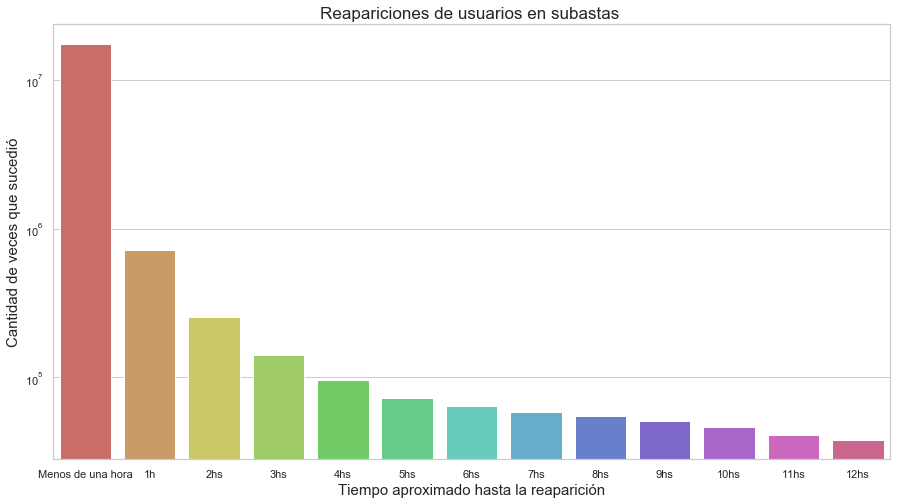

In [22]:
graph = sns.barplot(x= df_users['tiempo_reap'], y = df_users['cant_ocurrencias'], orient='v', palette="hls")
graph.set_xlabel("Tiempo aproximado hasta la reaparición", fontsize = 15)
graph.set_ylabel("Cantidad de veces que sucedió", fontsize = 15)
graph.set_title("Reapariciones de usuarios en subastas ", fontsize = 17)
graph.set_yscale('log')